### 0. Importing Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1. Reading and Exploring Dataset

##### 1.1 Reading csv file as a DataFrame using Pandas

In [ ]:
df_hotel = pd.read_csv("/content/Hotel Bookings.csv")
df_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015


##### 1.2 Number of Data Points

In [ ]:
df_hotel.shape

(119390, 32)

##### 1.3 Concise Summary of Data Frame

In [ ]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

##### 1.4 Checking Number of Missing Values (As we can see in summary only 4 columns have missing values)

In [ ]:
df_hotel.isnull().sum().sort_values(ascending=False)[:4]

company     112593
agent        16340
country        488
children         4
dtype: int64

##### 1.5 Handling missing values

In [ ]:
# 1.6.1 company has numerical values, so filling missing values with 0
df_hotel['company'].fillna(0, inplace=True)

# 1.6.2 agent has numerical values, so filling missing values with 0
df_hotel['agent'].fillna(0, inplace=True)

# 1.6.3 country has string values, so filling missing values as 'unknown'
df_hotel['country'].fillna('unknown', inplace=True)

# 1.6.4 children has numerical values, so filling missing values as 0
df_hotel['children'].fillna(0, inplace=True)

## Verifying again missing values
df_hotel.isnull().sum().sort_values(ascending=False)[:4]

hotel                        0
is_canceled                  0
reservation_status           0
total_of_special_requests    0
dtype: int64

##### 1.6 Checking and handling duplicate rows

In [ ]:
## Checking for Number of duplicate rows
duplicateRow = df_hotel[df_hotel.duplicated()].shape
print("No. of duplicate Entries",duplicateRow[0])

## Dropping duplicates
df_hotel.drop_duplicates(inplace=True)
duplicateRow = df_hotel[df_hotel.duplicated()].shape
print("No. of duplicate Entries after removing are", duplicateRow[0])

No. of duplicate Entries 31994
No. of duplicate Entries after removing are 0


##### 1.7 Checking if any bookings have no people(adults, children, babies) as we can simply ignore those entries

In [ ]:
## Checking for Entries with no people
noPeopleRow = df_hotel[df_hotel['adults'] + df_hotel['babies'] + df_hotel['children'] == 0].shape
print("No. of entries with no People", noPeopleRow[0])

## Removing those Entries
df_hotel.drop(df_hotel[df_hotel['adults'] + df_hotel['babies'] + df_hotel['children'] == 0].index,inplace=True)
noPeopleRow = df_hotel[df_hotel['adults'] + df_hotel['babies'] + df_hotel['children'] == 0].shape
print("No. of entries with no People after cleaning", noPeopleRow[0])

No. of entries with no People 166
No. of entries with no People after cleaning 0


##### 1.8 Descriptive Statistics of Numerical Columns of Data Frame

In [ ]:
df_hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000
mean,0.275238,79.971019,2016.210352,26.835091,15.815832,1.004609,2.623925,1.879365,0.138897,0.010845,0.038565,0.030402,0.184054,0.268497,81.089258,10.984948,0.746291,106.518031,0.084306,0.698934
std,0.446637,86.058683,0.686064,13.669216,8.835545,1.027408,2.039830,0.621724,0.456265,0.113704,0.192556,0.369344,1.733033,0.710633,109.977255,53.956668,10.001001,54.891227,0.281659,0.832051
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,72.250000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,98.200000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,0.000000,134.100000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### 2. Analysis

##### 2.1 Which Hotel has more bookings ?

Types of hotels ['Resort Hotel' 'City Hotel']


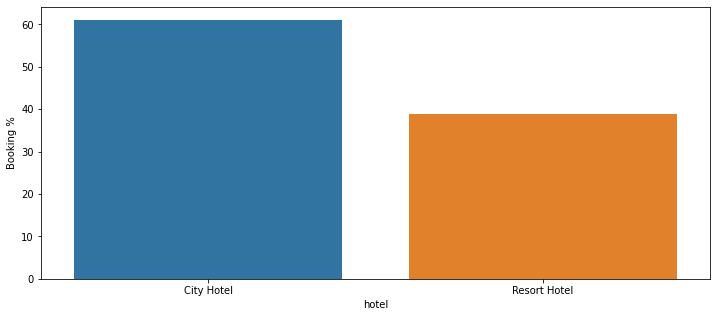

In [ ]:
print("Types of hotels", df_hotel['hotel'].unique())
#Plotting seaborn for counting booking in hotel
grouped_by_hotel = df_hotel.groupby('hotel')
d1 = pd.DataFrame((grouped_by_hotel.size()/df_hotel.shape[0])*100).reset_index().rename(columns = {0:'Booking %'}) #Calculating percentage
plt.figure(figsize = (12,5))
sns.barplot(x = d1['hotel'], y = d1['Booking %'] )

plt.show()


##### 2.2 Number of cancellation bookings

Total Bookings cancelled
0    63221
1    24009
Name: is_canceled, dtype: int64
Cancelation percentage
0    0.724762
1    0.275238
Name: is_canceled, dtype: float64


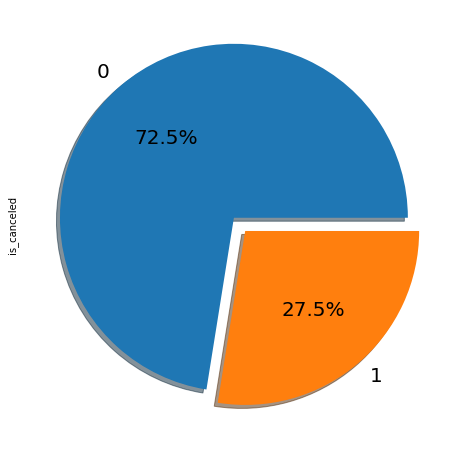

In [ ]:
print('Total Bookings cancelled')
print(df_hotel.is_canceled.value_counts())
print('Cancelation percentage')
print(df_hotel.is_canceled.value_counts(normalize=True))

plt.figure(figsize=(18,7))

#Canceled=1, Not canceled= 0
df_hotel['is_canceled'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)

# sns.countplot(df1['is_canceled'], palette='husl')
plt.show()

##### 2.3 Which month has more number of booings

August       11242
July         10043
May           8344
April         7900
June          7756
March         7489
October       6921
September     6682
February      6083
December      5112
November      4973
January       4685
Name: arrival_date_month, dtype: int64


Text(0, 0.5, 'Reservation Count')

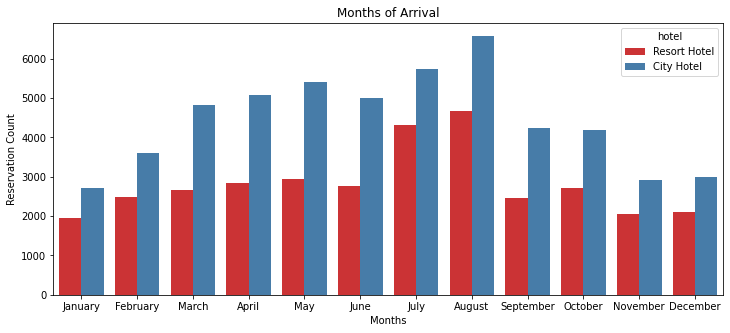

In [ ]:
print(df_hotel['arrival_date_month'].value_counts())

plt.figure(figsize=(12,5))
graph=sns.countplot(data= df_hotel, x='arrival_date_month', hue = 'hotel',order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December'], palette = "Set1")
graph.set(title='Months of Arrival')
graph.set_xlabel('Months')
graph.set_ylabel('Reservation Count')

##### 2.4 In which year there are more number of bookings

2016    42313
2017    31633
2015    13284
Name: arrival_date_year, dtype: int64


Text(0, 0.5, 'Reservation Count')

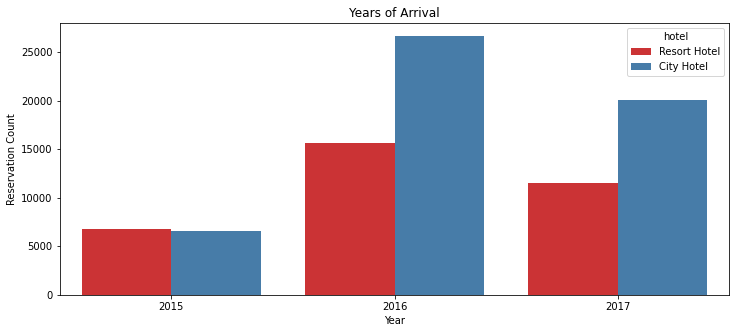

In [ ]:
print(df_hotel['arrival_date_year'].value_counts())

plt.figure(figsize=(12,5))
# sns.set_theme(style="whitegrid")
graph=sns.countplot(data= df_hotel, x='arrival_date_year', hue = 'hotel', palette = "Set1")
graph.set(title='Years of Arrival')
graph.set_xlabel('Year')
graph.set_ylabel('Reservation Count')


##### 2.5 Which meal is preferred more by customers

BB           0.778482
SC           0.107658
HB           0.104093
Undefined    0.005640
FB           0.004127
Name: meal, dtype: float64


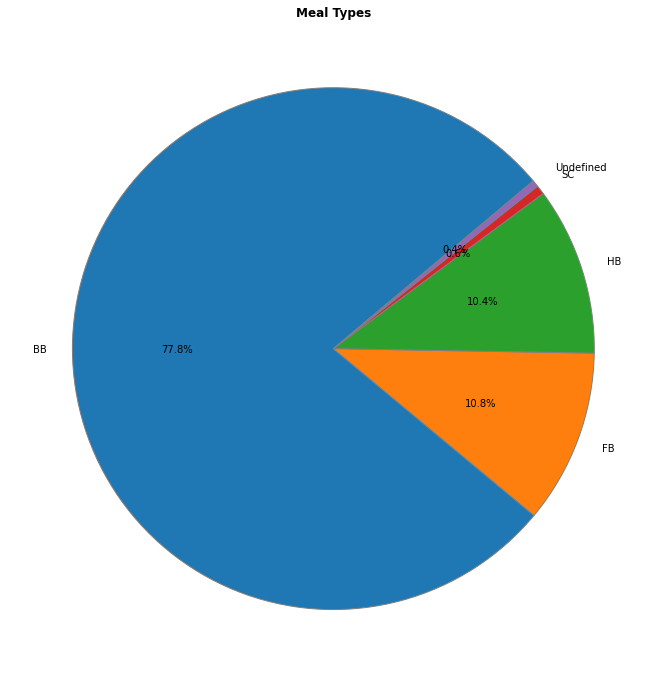

In [ ]:
meal=df_hotel.meal.value_counts(normalize=True)
print(meal)
meal_labels= ['BB','FB','HB','SC', 'Undefined']

plt.figure(figsize=(12,12))
plt.pie(meal, explode=None, labels=meal_labels,  autopct='%1.1f%%', startangle=40,wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'gray' }) 
plt.title('Meal Types', weight='bold')
plt.show()

##### 2.6 From which country more guests came

  country  count
0     PRT  17573
1     GBR   8440
2     FRA   7091
3     ESP   5382
4     DEU   4332
5     IRL   2347
6     ITA   1986
7     BEL   1670
8     NLD   1560
9     USA   1412


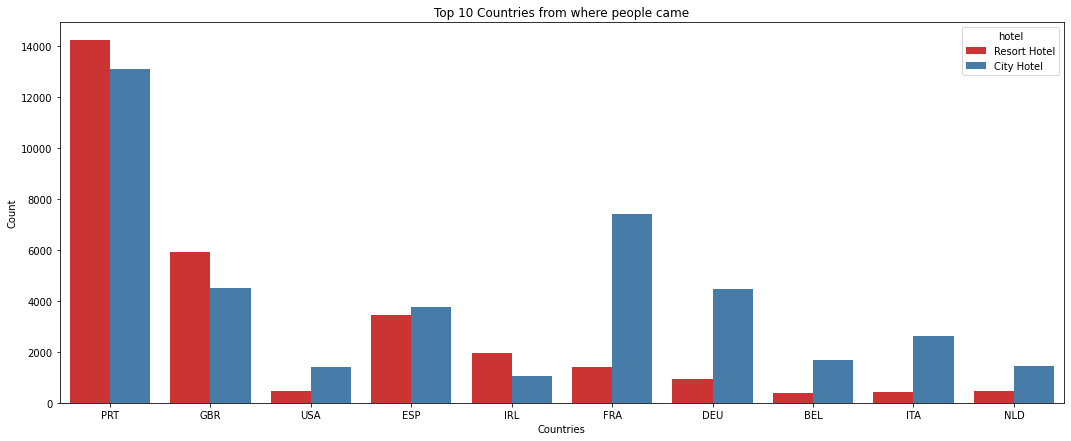

In [ ]:
country_wise_guests = df_hotel[df_hotel['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'count']
print(country_wise_guests.head(10))

top_10_countries =df_hotel[df_hotel['country'].isin(["PRT","GBR","FRA","ESP","DEU","IRL","ITA",
                         "BEL","NLD","USA"])]
plt.figure(figsize=(18,7))
graph=sns.countplot(data= top_10_countries,x='country', hue = 'hotel',palette = "Set1")
graph.set(title='Top 10 Countries from where people came')
graph.set_xlabel('Countries')
graph.set_ylabel('Count')

import plotly.express as px
country_map = px.choropleth(country_wise_guests,
                          locations=country_wise_guests['country'],
                          color=np.log(country_wise_guests['count']), 
                          hover_name=country_wise_guests['country'], 
                          hover_data=["count"],
                          color_continuous_scale=px.colors.qualitative.Antique,
                          title="Country of Guests")
country_map.show()

##### 2.7 How long does people stay

In [ ]:
df_hotel['total_nights'] = df_hotel['stays_in_weekend_nights'] + df_hotel['stays_in_week_nights']
df_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,01-07-2015,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,01-07-2015,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0.0,0,Transient,75.0,0,0,Check-Out,02-07-2015,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0.0,0,Transient,75.0,0,0,Check-Out,02-07-2015,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0.0,0,Transient,98.0,0,1,Check-Out,03-07-2015,2


In [ ]:
stay_time = df_hotel.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay_time = stay_time.iloc[:, :3]
stay_time = stay_time.rename(columns={'is_canceled':'Number of Days'})
top_days = stay_time.head(30)
top_days

,total_nights,hotel,Number of Days
0,0,City Hotel,231
1,0,Resort Hotel,360
2,1,City Hotel,10270
3,1,Resort Hotel,6899
4,2,City Hotel,10813
5,2,Resort Hotel,4921
6,3,City Hotel,13542
7,3,Resort Hotel,4285
8,4,City Hotel,9610
9,4,Resort Hotel,3955


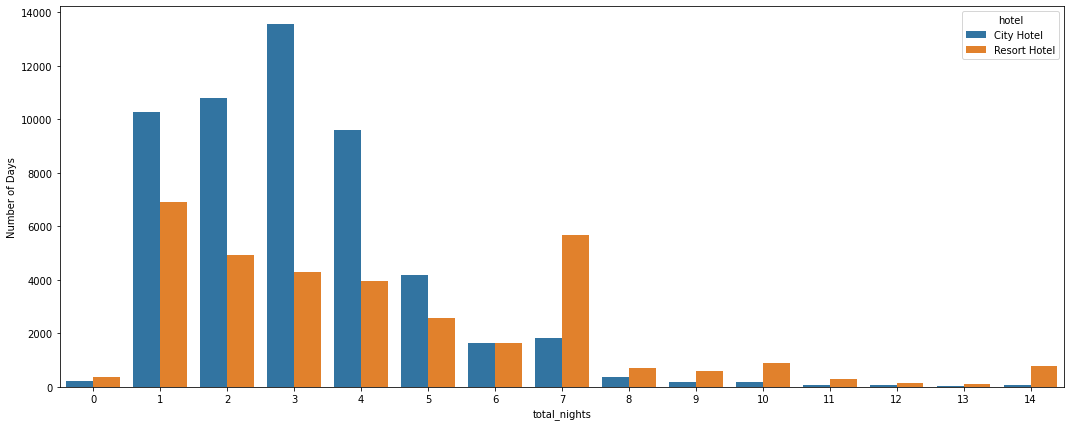

In [ ]:
plt.figure(figsize = (18,7))
# sns.lineplot(data=stay_time, x="total_nights", y="Number of Days", hue="hotel")
sns.barplot(x = 'total_nights', y = 'Number of Days',data= top_days,hue='hotel')

##### 2.8 Bookings are more on Weekdays or Weekends

Total weekday nights 228885
Total weekend nights 87632


Text(0, 0.5, 'Count')

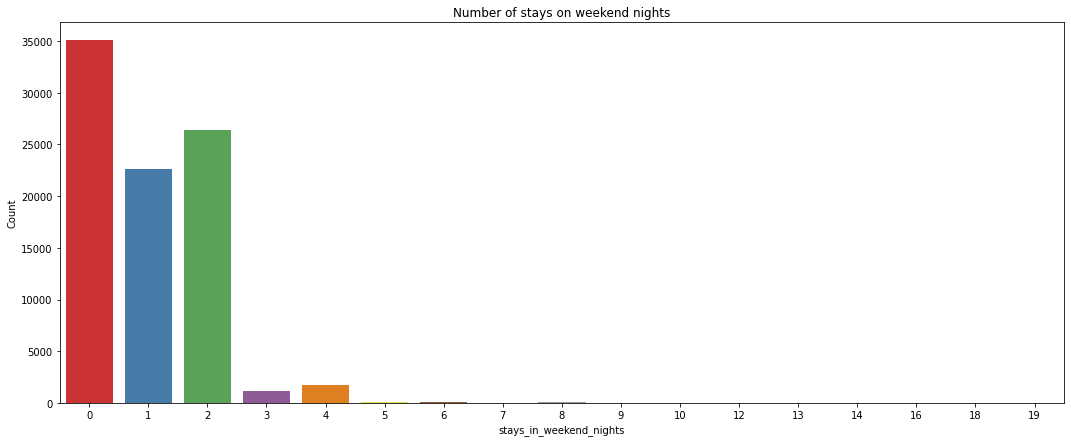

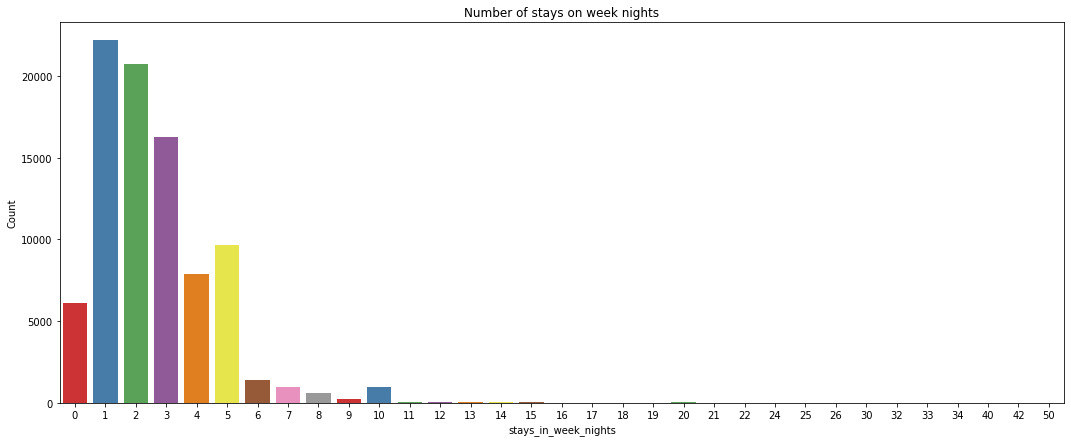

In [ ]:
weekend_nights = df_hotel['stays_in_weekend_nights'].sum()
weekday_nights = df_hotel['stays_in_week_nights'].sum()
print("Total weekday nights",weekday_nights)
print("Total weekend nights",weekend_nights)

#Plotting graph for number of weekend nights
plt.figure(figsize=(18,7))
graph=sns.countplot(data= df_hotel,x='stays_in_weekend_nights',palette = "Set1")
graph.set(title='Number of stays on weekend nights')
graph.set_xlabel('stays_in_weekend_nights')
graph.set_ylabel('Count')

#Plotting graph for number of week nights
plt.figure(figsize=(18,7))
graph=sns.countplot(data= df_hotel,x='stays_in_week_nights',palette = "Set1")
graph.set(title='Number of stays on week nights')
graph.set_xlabel('stays_in_week_nights')
graph.set_ylabel('Count')

##### 2.9 How often assigned rooms are different from reserved and do having children and/or babies have any impact ?

In [ ]:
def isAssgnRmDiffFromRsvdRm(item):
    if(item['reserved_room_type'] != item['assigned_room_type']):
        return 1
    else:
        return 0
def areAnyChildrenOrBabies(item):
    if(item['children'] > 0 or item['babies'] > 0):
        return 1
    else:
        return 0

df_hotel['got_different_room'] = df_hotel[['reserved_room_type','assigned_room_type']].apply(isAssgnRmDiffFromRsvdRm, axis = 1)
df_hotel['any_child_or_babies'] = df_hotel[['children','babies']].apply(areAnyChildrenOrBabies, axis = 1)

df_hotel.groupby(['got_different_room'])['got_different_room'].count()

got_different_room
0    74240
1    12990
Name: got_different_room, dtype: int64

,got_different_room,any_child_or_babies
got_different_room,1.000000,-0.010806
any_child_or_babies,-0.010806,1.000000


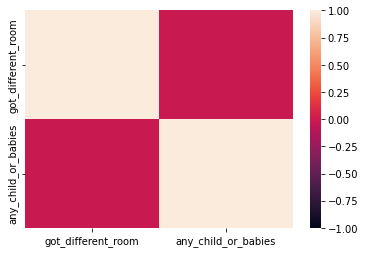

In [ ]:
df = df_hotel[['got_different_room','any_child_or_babies']]
sns.heatmap(df.corr(), vmin=-1, vmax=1)
df.corr()

In [ ]:
df_gotDiffRoom = df_hotel[df_hotel['got_different_room'] == 1]
df = df_gotDiffRoom.groupby(['hotel']).agg({'any_child_or_babies': ['count','sum']})
print(df)
df.apply(lambda x: x.any_child_or_babies['sum'] / x.any_child_or_babies['count'], axis = 1)

             any_child_or_babies     
                           count  sum
hotel                                
City Hotel                  5980  844
Resort Hotel                7010  409


hotel
City Hotel      0.141137
Resort Hotel    0.058345
dtype: float64

In [ ]:
df_gotSameRoom = df_hotel[df_hotel['got_different_room'] == 0]
df = df_gotSameRoom.groupby(['hotel']).agg({'any_child_or_babies': ['count','sum']})
print(df)
df.apply(lambda x: x.any_child_or_babies['sum'] / x.any_child_or_babies['count'], axis = 1)

             any_child_or_babies      
                           count   sum
hotel                                 
City Hotel                 47294  4390
Resort Hotel               26946  3460


hotel
City Hotel      0.092824
Resort Hotel    0.128405
dtype: float64

##### 2.10 Do non repeated guests cancel more often than repeated ones ?

,is_repeated_guest,is_canceled
is_repeated_guest,1.000000,-0.088764
is_canceled,-0.088764,1.000000


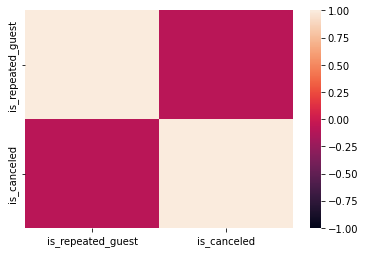

In [ ]:
df = df_hotel[['is_repeated_guest','is_canceled']]
sns.heatmap(df.corr(), vmin=-1, vmax=1)
df.corr()

In [ ]:
df_isRepeatedUser = df_hotel[df_hotel['is_repeated_guest'] == 1]
df = df_gotDiffRoom.groupby(['hotel']).agg({'is_canceled': ['count','sum']})
print(df)
df.apply(lambda x: x.is_canceled['sum'] / x.is_canceled['count'], axis = 1)

             is_canceled     
                   count  sum
hotel                        
City Hotel          5980  314
Resort Hotel        7010  302


hotel
City Hotel      0.052508
Resort Hotel    0.043081
dtype: float64

In [ ]:
df_isNonRepeatedUser = df_hotel[df_hotel['is_repeated_guest'] == 0]
df = df_isNonRepeatedUser.groupby(['hotel']).agg({'is_canceled': ['count','sum']})
print(df)
df.apply(lambda x: x.is_canceled['sum'] / x.is_canceled['count'], axis = 1)

             is_canceled       
                   count    sum
hotel                          
City Hotel         51617  15847
Resort Hotel       32249   7902


hotel
City Hotel      0.307011
Resort Hotel    0.245031
dtype: float64

##### 2.11 Do customers who were on the waiting list for a long time have less cancellation compared to others ?

,lead_time,is_canceled
lead_time,1.000000,0.184515
is_canceled,0.184515,1.000000


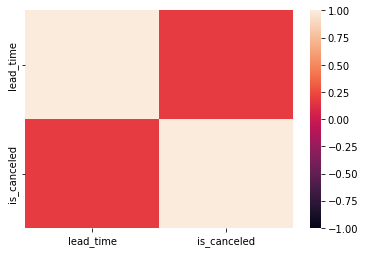

In [ ]:
df = df_hotel[['lead_time','is_canceled']]
sns.heatmap(df.corr(), vmin=-1, vmax=1)
df.corr()

In [ ]:
df_isCancelled = df_hotel[df_hotel['is_canceled'] == 1]
df = df_isCancelled.groupby(['hotel']).agg({'lead_time': ['mean']})
df

,lead_time
,mean
hotel,
City Hotel,101.657499
Resort Hotel,113.944444


In [ ]:
df_isNotCancelled = df_hotel[df_hotel['is_canceled'] == 0]
df = df_isNotCancelled.groupby(['hotel']).agg({'lead_time': ['mean']})
df

,lead_time
,mean
hotel,
City Hotel,67.517388
Resort Hotel,74.009738


##### 2.12 Do a number of special requests have any correlation with having children/babies ?

,total_of_special_requests,any_child_or_babies
total_of_special_requests,1.000000,0.094623
any_child_or_babies,0.094623,1.000000


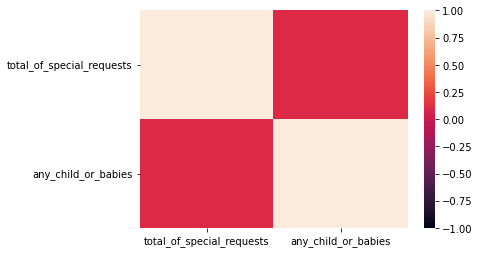

In [ ]:
df = df_hotel[['total_of_special_requests','any_child_or_babies']]
sns.heatmap(df.corr(), vmin=-1, vmax=1)
df.corr()

##### 2.13 Number of Booking per year for two hotels

In [ ]:
df = df_hotel.groupby(['hotel','arrival_date_year']).size()
df

hotel         arrival_date_year
City Hotel    2015                  6526
              2016                 26684
              2017                 20064
Resort Hotel  2015                  6758
              2016                 15629
              2017                 11569
dtype: int64

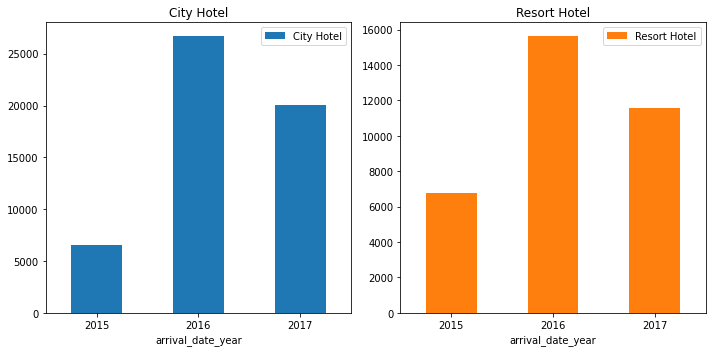

In [ ]:
ax = df.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(10, 5), layout=(1, 2))
plt.tight_layout()

##### 2.14 Customers distribution based on type

In [ ]:
df = df_hotel.groupby(['hotel','customer_type']).size()
df

hotel         customer_type  
City Hotel    Contract            1467
              Group                269
              Transient          44522
              Transient-Party     7016
Resort Hotel  Contract            1668
              Group                272
              Transient          27340
              Transient-Party     4676
dtype: int64

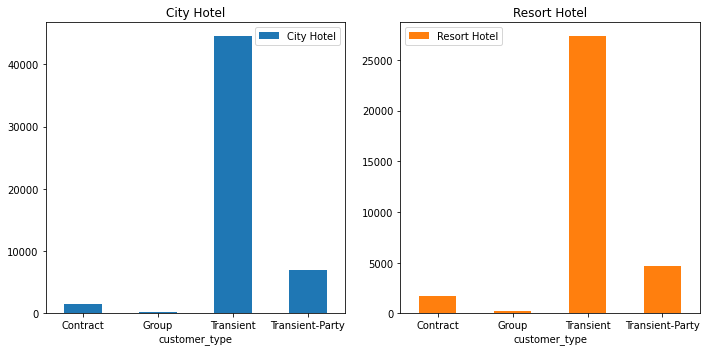

In [ ]:
ax = df.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(10, 5), layout=(1, 2))
plt.tight_layout()

##### 2.15 Booking distribution based on Assigned Room Types

In [ ]:
df = df_hotel.groupby(['hotel','assigned_room_type']).size()
df

hotel         assigned_room_type
City Hotel    A                     33377
              B                      1652
              C                       158
              D                     13197
              E                      2046
              F                      1970
              G                       689
              K                       185
Resort Hotel  A                     12906
              B                       159
              C                      2002
              D                      9222
              E                      5144
              F                      1657
              G                      1806
              H                       706
              I                       353
              L                         1
dtype: int64

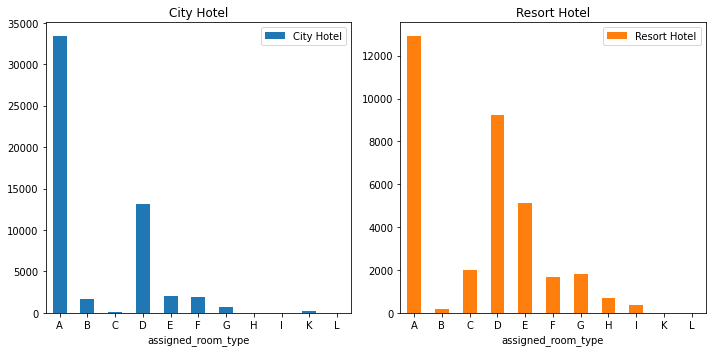

In [ ]:
ax = df.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(10, 5), layout=(1, 2))
plt.tight_layout()

##### 2.16 Which agent made most bookings

In [ ]:
highest_bookings= df_hotel.groupby(['agent'])['agent'].agg({'count'}).reset_index().rename(columns={'count': "Most_Bookings" }).sort_values(by='Most_Bookings',ascending=False)

# as agent 0 was NAN value and we replaced it with 0 and indicates no bookings.so droping.
highest_bookings.drop(highest_bookings[highest_bookings['agent']==0].index,inplace=True) 

# taking top 10 bookings made by agent
top_ten_highest_bookings=highest_bookings[:10]

top_ten_highest_bookings

,agent,Most_Bookings
9,9.0,28721
174,240.0,13028
14,14.0,3342
7,7.0,3294
183,250.0,2779
175,241.0,1644
27,28.0,1493
8,8.0,1383
1,1.0,1228
6,6.0,1117


Text(0.5, 1.0, 'Most Bookings Made by the agent')

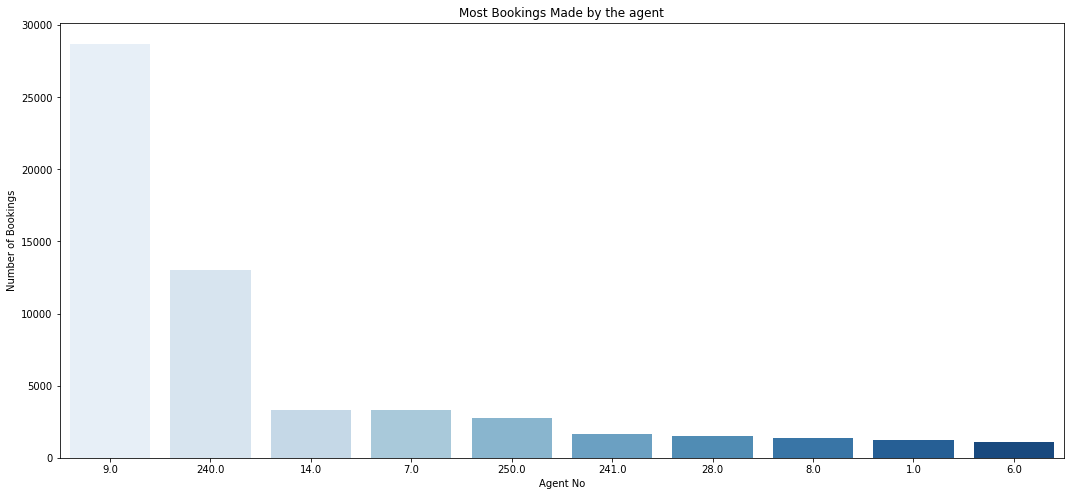

In [ ]:
#Visualizaing the graph

plt.figure(figsize=(18,8))
sns.barplot(x=top_ten_highest_bookings['agent'],y=top_ten_highest_bookings['Most_Bookings'],order=top_ten_highest_bookings['agent'],palette='Blues')
plt.xlabel('Agent No')
plt.ylabel('Number of Bookings')
plt.title("Most Bookings Made by the agent")

##### 2.17 Does a meal type have any correlation with Cancellation ?

In [ ]:
meal_type_df=df_hotel[['meal','is_canceled']]
meal_type_df.drop(meal_type_df[meal_type_df['is_canceled'] == 0].index,inplace=True)
meal_type_df['meal'].value_counts()

BB           18043
SC            3336
HB            2449
FB              99
Undefined       82
Name: meal, dtype: int64

Text(0.5, 1.0, 'Cancellation Rate Vs market_segment')

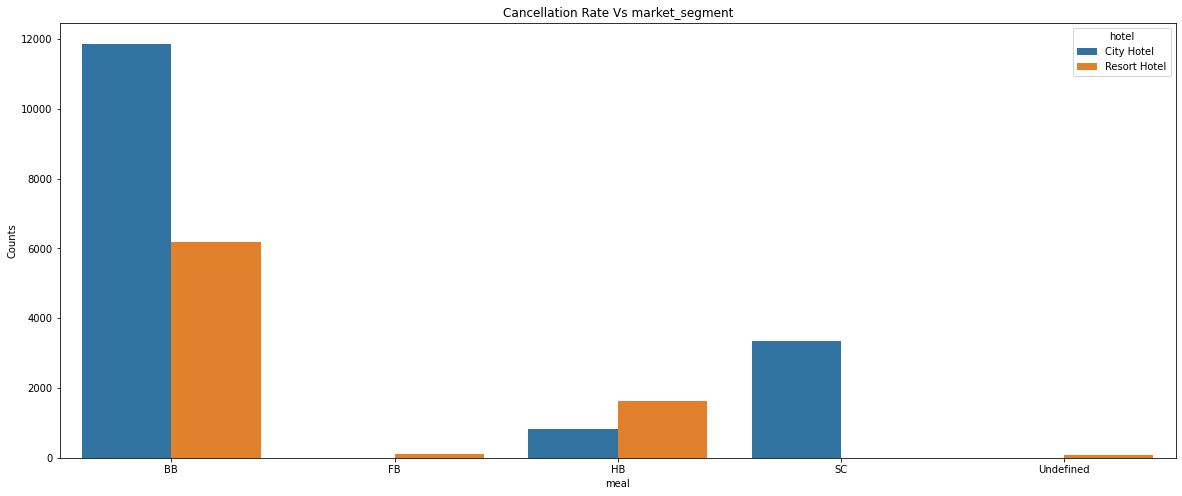

In [ ]:
food_segment_df=df_hotel[df_hotel['is_canceled']==1] 
food_segment_df=food_segment_df.groupby(['meal','hotel']).size().reset_index().rename(columns={0:'counts'})   # group by
plt.figure(figsize=(20,8))
sns.barplot(x='meal',y='counts',hue="hotel",data= food_segment_df)
# set labels
plt.xlabel('meal')
plt.ylabel('Counts')
plt.title('Cancellation Rate Vs market_segment')

##### 2.18 Which type of food is most preferred

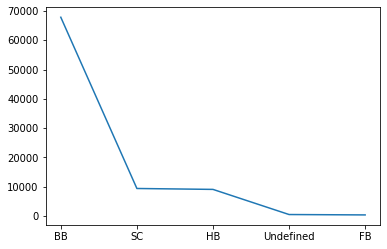

In [ ]:
plt.plot(df_hotel['meal'].value_counts())
plt.show()

##### 2.19 Which market segment has most number of bookings?

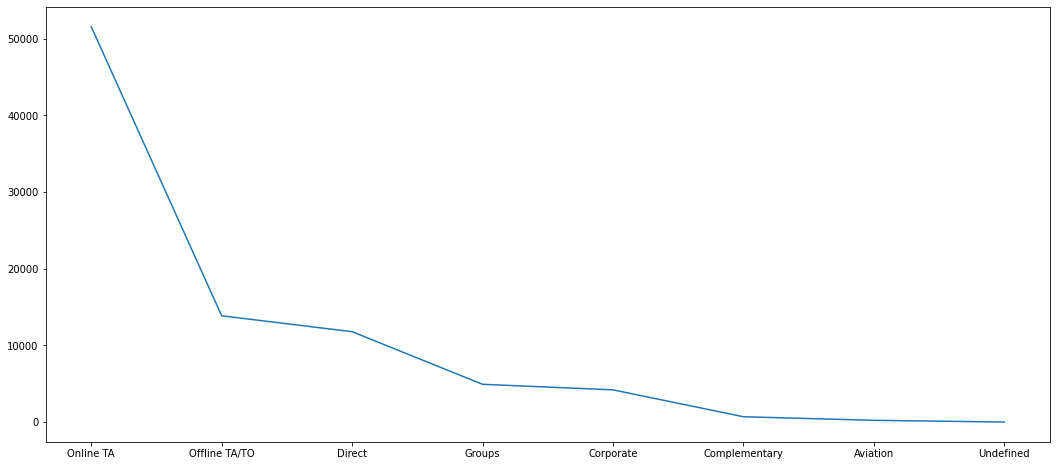

In [ ]:
plt.figure(figsize=(18,8))
plt.plot(df_hotel['market_segment'].value_counts())
plt.show()

##### 2.20 Which Market Segment has most Cancellation

Text(0.5, 1.0, 'Cancellation Rate Vs market_segment')

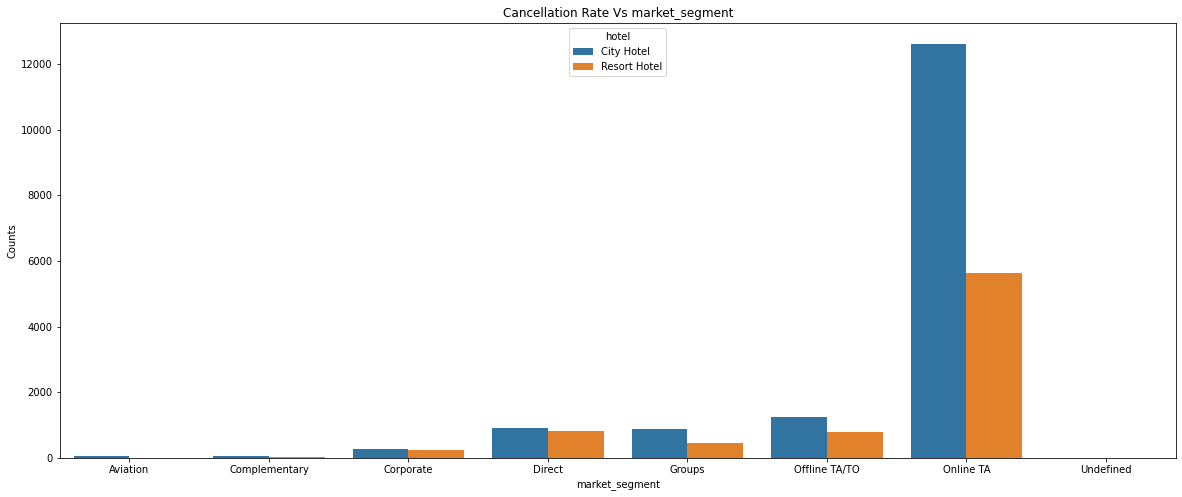

In [ ]:
market_segment_df=df_hotel[df_hotel['is_canceled']==1] 
market_segment_df=market_segment_df.groupby(['market_segment','hotel']).size().reset_index().rename(columns={0:'counts'})   # group by
plt.figure(figsize=(20,8))
sns.barplot(x='market_segment',y='counts',hue="hotel",data= market_segment_df)
# set labels
plt.xlabel('market_segment')
plt.ylabel('Counts')
plt.title('Cancellation Rate Vs market_segment')

##### 2.21 Which hotel has the most number of repeated guests/customers?

Text(0.5, 1.0, ' Percentgae (%) of repeated guests')

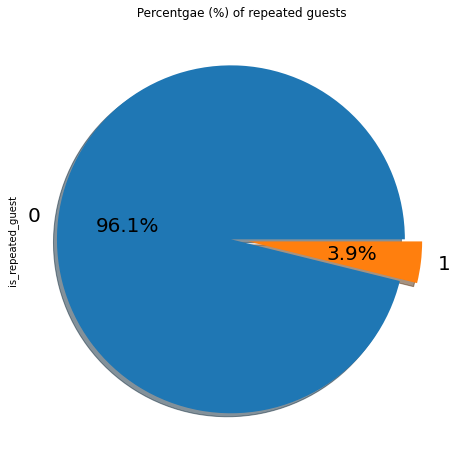

In [ ]:
df_hotel['is_repeated_guest'].value_counts().plot.pie(explode=(0.05,0.05),autopct='%1.1f%%',shadow=True,figsize=(12,8),fontsize=20)
plt.title(" Percentgae (%) of repeated guests")

Text(0.5, 1.0, 'Most repeated guests for each hotel')

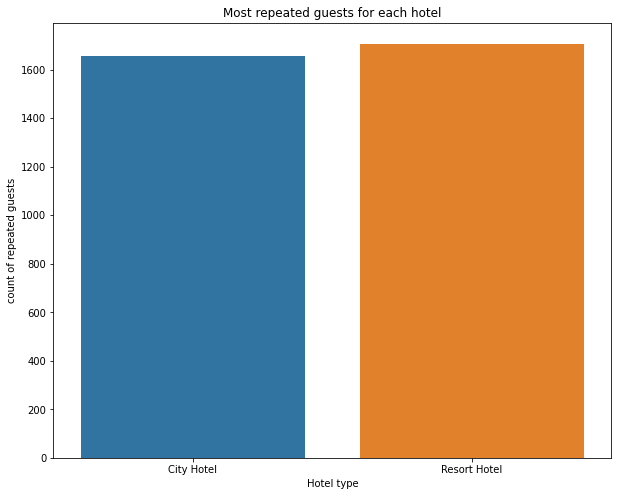

In [ ]:
repeated_guests_df=df_hotel[df_hotel['is_repeated_guest']==1].groupby('hotel').size().reset_index().rename(columns={0:'number_of_repated_guests'})
#set plot size adn plot barplot
plt.figure(figsize=(10,8))
sns.barplot(x=repeated_guests_df['hotel'],y=repeated_guests_df['number_of_repated_guests'])

# set labels
plt.xlabel('Hotel type')
plt.ylabel('count of repeated guests')
plt.title("Most repeated guests for each hotel")

Text(0.5, 1.0, 'Cancellation Rate Vs deposit')

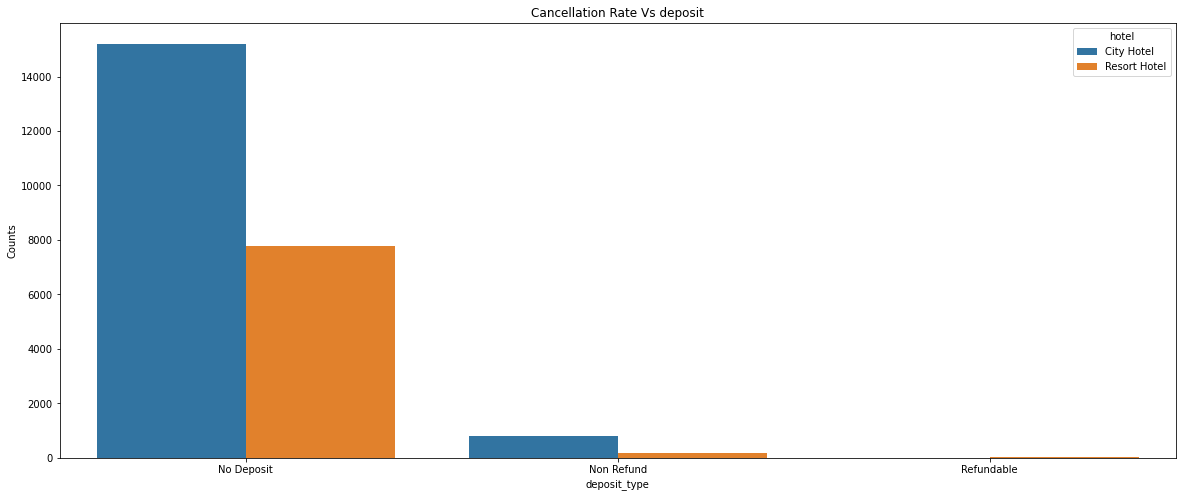

In [ ]:
dep_df=df_hotel[df_hotel['is_canceled']==1] 
dep_df=dep_df.groupby(['deposit_type','hotel']).size().reset_index().rename(columns={0:'counts'})   # group by
plt.figure(figsize=(20,8))
sns.barplot(x='deposit_type',y='counts',hue="hotel",data= dep_df)
# set labels
plt.xlabel('deposit_type')
plt.ylabel('Counts')
plt.title('Cancellation Rate Vs deposit')

##### 2.22 Correlation between deposit type and cancellation

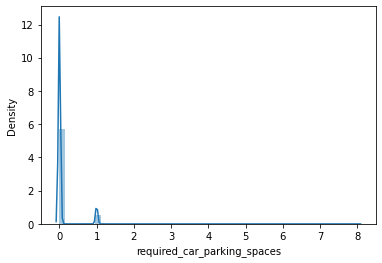

In [ ]:
sns.distplot(df_hotel.required_car_parking_spaces)
plt.show()

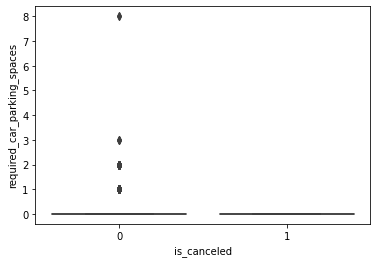

In [ ]:
sns.boxplot(x='is_canceled',y='required_car_parking_spaces',data=df_hotel)
plt.show()